In [19]:
#Import bibliotek
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
#Wczytanie zbioru
df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
#Usunięcie kolumny z indeksami i kolumny track_id
df = df.drop(df.columns[[0, 1]], axis=1)

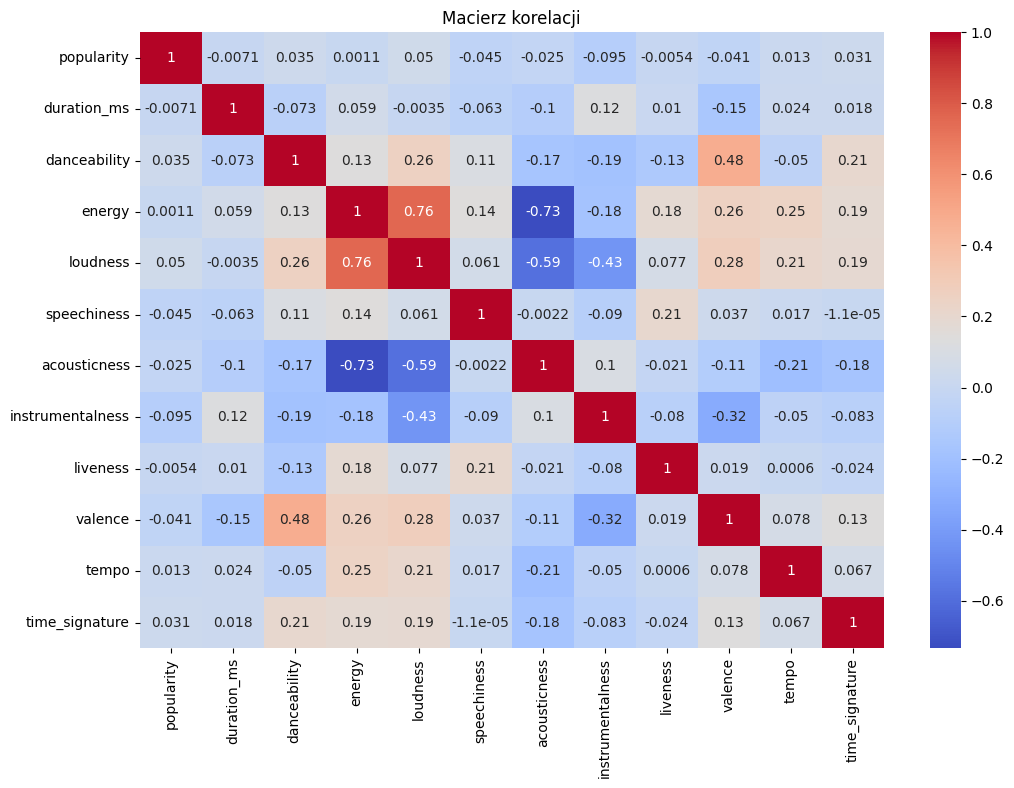

In [27]:
#Macierz korelacji
df_corr = df[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Macierz korelacji")
plt.show()

Analiza macierzy korelacji:
1. Silną korelację ujemną (-0.73) mają zmienne energy i acousticness. Zmienna energy jest miarą od 0.0 do 1.0 i reprezentuje percepcyjną miarę intensywności i aktywności utworu. Zmienna acousticness jest miarą zaufania od 0.0 do 1.0, która określa, czy utwór jest akustyczny. 1.0 oznacza wysokie zaufanie, że utwór jest akustyczny. Korelacja ta sugeruje, że utwory mające lepszą akustykę są zazwyczaj mniej energiczne.

2. Wyraźną korelację ujemną (-0.59) mają zmienne acousticness i loudness. Zmienna loudness wyraża głośność utworu w decybelach. Korelacja ta sugeruje, że utwory cichsze mają z reguły lepszą akustykę.

3. Silną korelację dodatnią (0.76) mają zmienne energy i loudness. Taka korelacja sugeruje, że utwory bardziej energiczne i intensywne są zazwyczaj głośniejsze.

4. Umiarkowaną korelację dodatnią (0.48) mają zmienne danceability i valence. Zmienna danceability opisuje, jak odpowiedni jest utwór do tańca w oparciu o kombinację różnych elementów muzycznych. Wartość 0.0 oznacza najmniejszą taneczność, a 1.0 największą taneczność. Zmienna valence jest miarą od 0.0 do 1.0 opisującą muzyczną pozytywność przekazywaną przez utwór. Utwory o wysokim valence brzmią bardziej pozytywnie, podczas gdy utwory o niskiej wartościowości brzmią bardziej negatywnie. Korelacja ta sugeruje, że utwory bardziej pozytywne są zwykle lepsze do tańczenia.

In [40]:
#Procent piosenek z wulgaryzmami dla każdego gatunku muzycznego
explicit_percent = (
    df.groupby('track_genre')['explicit']
    .mean()  # Średnia True (1) vs False (0) da nam procent
    .mul(100)  # Przeliczenie na procenty
    .reset_index()  # Reset indeksu dla łatwego wyświetlania
    .rename(columns={'explicit': 'explicit_percentage'})  # Nazwa kolumny z procentami
)

# Sortowanie malejąco po explicit_percentage
explicit_percent_sorted = explicit_percent.sort_values(by='explicit_percentage', ascending=False)

# Wyświetlenie wyników tekstowo
for index, row in explicit_percent_sorted.iterrows():
    print(f"Gatunek: {row['track_genre']}, Procent piosenek explicit: {row['explicit_percentage']:.2f}%")

Gatunek: comedy, Procent piosenek explicit: 65.60%
Gatunek: emo, Procent piosenek explicit: 46.50%
Gatunek: sad, Procent piosenek explicit: 45.00%
Gatunek: j-dance, Procent piosenek explicit: 39.10%
Gatunek: hardcore, Procent piosenek explicit: 32.50%
Gatunek: hip-hop, Procent piosenek explicit: 31.90%
Gatunek: funk, Procent piosenek explicit: 30.40%
Gatunek: dancehall, Procent piosenek explicit: 30.20%
Gatunek: metalcore, Procent piosenek explicit: 29.10%
Gatunek: death-metal, Procent piosenek explicit: 25.10%
Gatunek: latino, Procent piosenek explicit: 24.90%
Gatunek: industrial, Procent piosenek explicit: 23.60%
Gatunek: french, Procent piosenek explicit: 21.90%
Gatunek: turkish, Procent piosenek explicit: 21.80%
Gatunek: reggaeton, Procent piosenek explicit: 21.20%
Gatunek: dance, Procent piosenek explicit: 17.40%
Gatunek: chill, Procent piosenek explicit: 17.10%
Gatunek: reggae, Procent piosenek explicit: 16.70%
Gatunek: alternative, Procent piosenek explicit: 16.40%
Gatunek: grin

Największy procent piosenek (65,6 %) z wulgaryzmami ma gatunek comedy. Na drugim miejscu jest gatunek emo (46,5 %), a na trzecim gatunek sad (45 %).

Spory procent piosenek z wulgaryzmami mają też takie gatunki, jak hip-hop, hardcore (gatunek wyrażający intensywne emocje w brzmieniu i tekstach) , czy j-dance (gatunek związany z japońską muzyką).

Można też zauważyć, że w zbiorze tym jest kilka piosenek z Disneya, które zawierają wulgaryzmy.

In [48]:
#Najdłuższy utwór
max_index = df['duration_ms'].idxmax()
longest_song = df.loc[max_index]
longest_song

,73617
artists,Tale Of Us
album_name,Unity (Voyage Mix)
track_name,Unity (Voyage Mix) Pt. 1
popularity,35
duration_ms,5237295
explicit,False
danceability,0.695
energy,0.736
key,5
loudness,-11.371


Najdłuższym utworem jest utwór z gatunku minimal-techno pod tytułem "Unity (Voyage Mix) Pt. 1" autorstwa Tale Of Us. Utwór ten trwa 5237295 ms, czyli ok. 87 minut.

In [51]:
#Średni czas trwania utworu
mean_duration = df['duration_ms'].mean()
mean_duration

228029.15311403509

Średni czas trwania utworu to ok. 228029 ms, czyli ok. 3 minuty i 48 sekund.

In [50]:
#Najgłośniejszy utwór
max_index = df['loudness'].idxmax()
loudest_song = df.loc[max_index]
loudest_song

,17574
artists,Five Star Hotel
album_name,Gray Data
track_name,Fate Dance
popularity,16
duration_ms,237000
explicit,False
danceability,0.31
energy,0.999
key,4
loudness,4.532


Najgłośniejszym utworem jest utwór z muzyki klubowej pod tytułem "Fate Dance" autorstwa Five Star Hotel. Ma on 4.532 dB.

In [52]:
#Najcichszy utwór
min_index = df['loudness'].idxmin()
quietest_song = df.loc[min_index]
quietest_song

,101888
artists,White Noise Sleep Sounds
album_name,Soothing White Noise
track_name,Soothing White Noise - Loopable With No Fade
popularity,32
duration_ms,65248
explicit,False
danceability,0.0
energy,0.000687
key,10
loudness,-49.531


Najcichszym utworem jest utwór do spania pod tytułem "Soothing White Noise - Loopable With No Fade" autorstwa White Noise Sleep Sounds. Ma on -49.531 dB.

In [53]:
#Średnia głośność
mean_loudness = df['loudness'].mean()
mean_loudness

-8.258960368421052

Średnia głośność to ok. -8.259 dB.

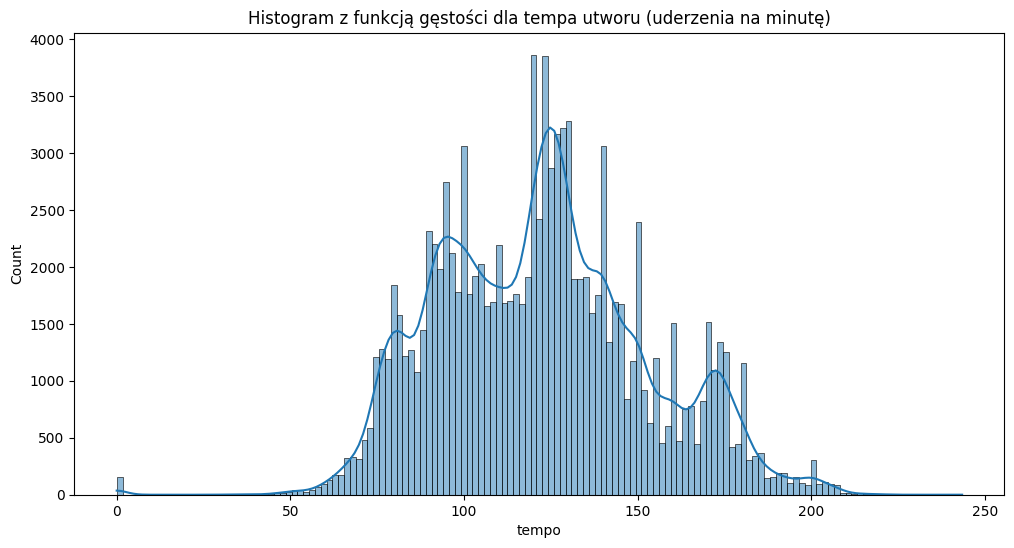

In [79]:
#Histogram tempa (uderzenia na minutę)
plt.figure(figsize=(12, 6))
sns.histplot(df['tempo'], kde=True)
plt.title("Histogram z funkcją gęstości dla tempa utworu (uderzenia na minutę)")
plt.show()

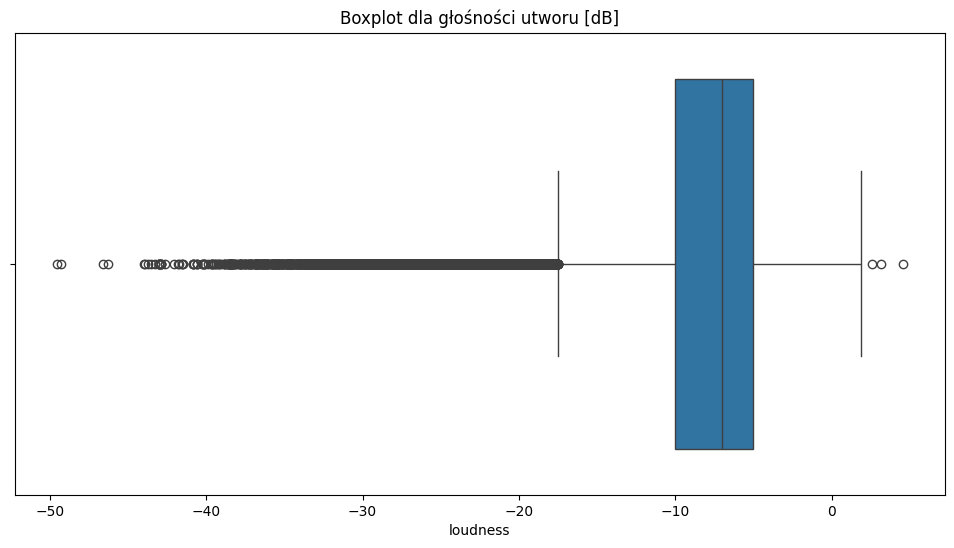

In [78]:
#Boxplot dla głośności utworu [dB]
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['loudness'])
plt.title("Boxplot dla głośności utworu [dB]")
plt.show()

In [77]:
#Rekordy w zbiorze, które nie mają wszystkich danych